In [1]:
import pandas as pd
train = pd.read_csv("hate_speech_labeled.csv", index_col = 0)

In [2]:
train = train.drop(['contain_gender_bias','bias','hate'], axis = 1)
train.head()
#1이 부정문장, 0이 긍정문장

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,1
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,0
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",1
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",0
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,1


In [3]:
X_train_text = train.comments
y_train = train.label
print(X_train_text.head(),y_train.head())

0    (현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...
1    ....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...
2    ...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...
3                   1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데
4    1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...
Name: comments, dtype: object 0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64


(array([3273., 4623.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

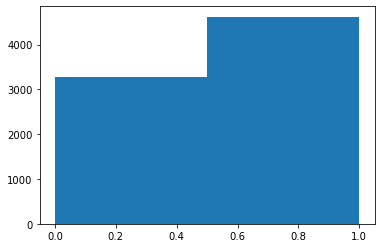

In [4]:
from matplotlib import pyplot as plt
plt.hist(y_train, bins = 2)
#일반 문장 약 3000개, 악성 문장 약 5000개

In [5]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
#벡터화
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_train[0]

<1x37157 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [7]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [8]:
#TP(11): 일반->일반
#FN(12): 일반->악성
#FP(21): 악성->일반
#TN(22): 악성->악성

pred = clf.predict(X_train)
print("정확도: ", sklearn.metrics.accuracy_score(y_train, pred))
print("Confusion Matrix: \n", confusion_matrix(y_train,pred,normalize = 'pred'))

정확도:  0.9659321175278622
Confusion Matrix: 
 [[0.99636484 0.05297741]
 [0.00363516 0.94702259]]


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_train, pred)
print(p)
r = recall_score(y_train, pred)
print(r)
f1 = f1_score(y_train, pred)
print(f1)

0.9470225872689938
0.9976205926887303
0.9716633308753819


In [15]:
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer #대리분석

ModuleNotFoundError: No module named 'lime'

In [13]:
#비속어필터링함수
def filter_toxic(text):
    pipe = make_pipeline(vectorizer, clf)
    pred = clf.predict(vectorizer.transform([text])[0])
    
    explainer = LimeTextExplainer(class_names=[0,1])
    exp = explainer.explain_instance(text, pipe.predict_proba)
    
    result = exp.as_list()
    toxic_list = [x[0] for x in result if x[1] >= 0.1]
    
    filtered = text
    for toxic in toxic_list:
        filtered = filtered.replace(toxic, "*"*len(toxic))
    
    print("origin txt: \n{}\n\nFiltered: \n{}".format(text, filtered))